In [1]:
#Setup your project variables:
# PLEASE EDIT THESE:
  
ProjectFolderName = 'Rat_lever'
VideoType = 'avi' 
video_name = 'Rat_1_head_1_20190429_153155_C001H001S0001'
#don't edit these:
# videofile_path = ['/content/drive/My Drive/'+ProjectFolderName+'/videos/'] #Enter the list of videos or folder to analyze.
videofile_path = ['/home/shiva/Desktop/'+video_name+'.avi']

In [2]:
print(videofile_path)

['/home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi']


In [2]:
import deeplabcut

In [4]:
deeplabcut.__version__
config_path = deeplabcut.create_new_project(ProjectFolderName,'Shiva',['/home/shiva/Desktop/'+video_name+'.avi'],copy_videos=True)

Created "/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/videos"
Created "/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/labeled-data"
Created "/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/training-datasets"
Created "/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-models"
Copying the videos
/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/videos/Rat_1_head_1_20190429_153155_C001H001S0001.avi
Generated "/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/config.yaml"

A new project with name Rat_lever-Shiva-2020-02-28 is created at /home/shiva/DeepLabCut/conda-environments and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add ne

In [5]:
deeplabcut.add_new_videos(config_path,['/home/shiva/Desktop/Rat.avi'],copy_videos=True)

Copying the videos
New video was added to the project! Use the function 'extract_frames' to select frames for labeling.


In [3]:
config_path = '/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/config.yaml'

In [6]:
!gedit Rat_lever-Shiva-2020-02-28/config.yaml

In [8]:
deeplabcut.extract_frames(config_path,'automatic','kmeans')#,'kmeans',userfeedback=False, crop=False)

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/videos/Rat_1_head_1_20190429_153155_C001H001S0001.avi ?
yes/noyes


179it [00:00, 1788.04it/s]

Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 546.0  seconds.
Extracting and downsampling... 16380  frames from the video.


16380it [00:07, 2153.30it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/videos/Rat.avi ?
yes/noyes


200it [00:00, 1994.64it/s]

Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 546.0  seconds.
Extracting and downsampling... 16380  frames from the video.


16380it [00:07, 2150.16it/s]


Kmeans clustering ... (this might take a while)

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


In [9]:
deeplabcut.label_frames(config_path)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


In [10]:
deeplabcut.check_labels(config_path)

Creating images with labels by Shiva.
They are stored in the following folder: /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/labeled-data/Rat_1_head_1_20190429_153155_C001H001S0001_labeled.
Attention: /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/labeled-data/Rat does not appear to have labeled data!
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## Create a training dataset:
After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [11]:
deeplabcut.create_training_dataset(config_path)

/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/labeled-data/Rat/CollectedData_Shiva.h5  not found (perhaps not annotated)
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([10,  3, 12, 19,  2,  8, 15,  9, 17, 16,  1, 14,  6,  0,  5, 13, 18,
          11,  4]),
   array([7])))]

## Set to run on GPU

In [12]:
device_name="/gpu:0"

## Start training:
This function trains the network for a specific shuffle of the training dataset. 
Typically, you want to train to 200,000 + iterations.

In [13]:

# deeplabcut.train_network(config_path,shuffle=1,trainingsetindex=0,
#             gputouse=None,max_snapshots_to_keep=5,autotune=False,displayiters=100,saveiters=15000, maxiters=30000)
deeplabcut.train_network(config_path, shuffle=1, displayiters=20, saveiters=500, maxiters=30000)

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 1.03M iterations). 
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....

Config:
{'all_joints': [[0]],
 'all_joints_names': ['finger1'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Rat_leverFeb28/Rat_lever_Shiva95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/shiva/anaconda3/envs/DLC/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Rat_leverFeb28/Documentation_data-Rat_lever_95shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,


Switching batchsize to 1, as default/tensorpack/deterministic loaders do not support batches >1. Use imgaug loader.
Starting with standard pose-dataset loader.
Initializing ResNet
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Loading ImageNet-pretrained resnet_50
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/shiva/anaconda3/envs/DLC/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Max_iters overwritten as 30000
Display_iters overwritten as 20
Save_iters overwritten as 500
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-mod

iteration: 20 loss: 0.1245 lr: 0.005
iteration: 40 loss: 0.0291 lr: 0.005
iteration: 60 loss: 0.0196 lr: 0.005
iteration: 80 loss: 0.0207 lr: 0.005
iteration: 100 loss: 0.0195 lr: 0.005
iteration: 120 loss: 0.0167 lr: 0.005
iteration: 140 loss: 0.0175 lr: 0.005
iteration: 160 loss: 0.0154 lr: 0.005
iteration: 180 loss: 0.0133 lr: 0.005
iteration: 200 loss: 0.0137 lr: 0.005
iteration: 220 loss: 0.0165 lr: 0.005
iteration: 240 loss: 0.0128 lr: 0.005
iteration: 260 loss: 0.0125 lr: 0.005
iteration: 280 loss: 0.0107 lr: 0.005
iteration: 300 loss: 0.0149 lr: 0.005
iteration: 320 loss: 0.0098 lr: 0.005
iteration: 340 loss: 0.0099 lr: 0.005
iteration: 360 loss: 0.0093 lr: 0.005
iteration: 380 loss: 0.0107 lr: 0.005
iteration: 400 loss: 0.0107 lr: 0.005
iteration: 420 loss: 0.0087 lr: 0.005
iteration: 440 loss: 0.0100 lr: 0.005
iteration: 460 loss: 0.0087 lr: 0.005
iteration: 480 loss: 0.0087 lr: 0.005
iteration: 500 loss: 0.0083 lr: 0.005
iteration: 520 loss: 0.0087 lr: 0.005
iteration: 540 l

Instructions for updating:
Use standard file APIs to delete files with this prefix.


iteration: 3020 loss: 0.0030 lr: 0.005
iteration: 3040 loss: 0.0034 lr: 0.005
iteration: 3060 loss: 0.0033 lr: 0.005
iteration: 3080 loss: 0.0046 lr: 0.005
iteration: 3100 loss: 0.0037 lr: 0.005
iteration: 3120 loss: 0.0037 lr: 0.005
iteration: 3140 loss: 0.0053 lr: 0.005
iteration: 3160 loss: 0.0034 lr: 0.005
iteration: 3180 loss: 0.0035 lr: 0.005
iteration: 3200 loss: 0.0033 lr: 0.005
iteration: 3220 loss: 0.0030 lr: 0.005
iteration: 3240 loss: 0.0034 lr: 0.005
iteration: 3260 loss: 0.0037 lr: 0.005
iteration: 3280 loss: 0.0031 lr: 0.005
iteration: 3300 loss: 0.0034 lr: 0.005
iteration: 3320 loss: 0.0032 lr: 0.005
iteration: 3340 loss: 0.0045 lr: 0.005
iteration: 3360 loss: 0.0037 lr: 0.005
iteration: 3380 loss: 0.0032 lr: 0.005
iteration: 3400 loss: 0.0027 lr: 0.005
iteration: 3420 loss: 0.0039 lr: 0.005
iteration: 3440 loss: 0.0032 lr: 0.005
iteration: 3460 loss: 0.0041 lr: 0.005
iteration: 3480 loss: 0.0031 lr: 0.005
iteration: 3500 loss: 0.0037 lr: 0.005
iteration: 3520 loss: 0.0

iteration: 7240 loss: 0.0027 lr: 0.005
iteration: 7260 loss: 0.0022 lr: 0.005
iteration: 7280 loss: 0.0036 lr: 0.005
iteration: 7300 loss: 0.0030 lr: 0.005
iteration: 7320 loss: 0.0031 lr: 0.005
iteration: 7340 loss: 0.0029 lr: 0.005
iteration: 7360 loss: 0.0027 lr: 0.005
iteration: 7380 loss: 0.0029 lr: 0.005
iteration: 7400 loss: 0.0029 lr: 0.005
iteration: 7420 loss: 0.0027 lr: 0.005
iteration: 7440 loss: 0.0028 lr: 0.005
iteration: 7460 loss: 0.0035 lr: 0.005
iteration: 7480 loss: 0.0031 lr: 0.005
iteration: 7500 loss: 0.0032 lr: 0.005
iteration: 7520 loss: 0.0028 lr: 0.005
iteration: 7540 loss: 0.0028 lr: 0.005
iteration: 7560 loss: 0.0025 lr: 0.005
iteration: 7580 loss: 0.0029 lr: 0.005
iteration: 7600 loss: 0.0024 lr: 0.005
iteration: 7620 loss: 0.0027 lr: 0.005
iteration: 7640 loss: 0.0023 lr: 0.005
iteration: 7660 loss: 0.0022 lr: 0.005
iteration: 7680 loss: 0.0022 lr: 0.005
iteration: 7700 loss: 0.0030 lr: 0.005
iteration: 7720 loss: 0.0033 lr: 0.005
iteration: 7740 loss: 0.0

iteration: 11460 loss: 0.0036 lr: 0.02
iteration: 11480 loss: 0.0033 lr: 0.02
iteration: 11500 loss: 0.0039 lr: 0.02
iteration: 11520 loss: 0.0039 lr: 0.02
iteration: 11540 loss: 0.0042 lr: 0.02
iteration: 11560 loss: 0.0039 lr: 0.02
iteration: 11580 loss: 0.0041 lr: 0.02
iteration: 11600 loss: 0.0036 lr: 0.02
iteration: 11620 loss: 0.0037 lr: 0.02
iteration: 11640 loss: 0.0037 lr: 0.02
iteration: 11660 loss: 0.0040 lr: 0.02
iteration: 11680 loss: 0.0043 lr: 0.02
iteration: 11700 loss: 0.0030 lr: 0.02
iteration: 11720 loss: 0.0027 lr: 0.02
iteration: 11740 loss: 0.0033 lr: 0.02
iteration: 11760 loss: 0.0035 lr: 0.02
iteration: 11780 loss: 0.0040 lr: 0.02
iteration: 11800 loss: 0.0032 lr: 0.02
iteration: 11820 loss: 0.0047 lr: 0.02
iteration: 11840 loss: 0.0041 lr: 0.02
iteration: 11860 loss: 0.0056 lr: 0.02
iteration: 11880 loss: 0.0045 lr: 0.02
iteration: 11900 loss: 0.0034 lr: 0.02
iteration: 11920 loss: 0.0036 lr: 0.02
iteration: 11940 loss: 0.0040 lr: 0.02
iteration: 11960 loss: 0.

KeyboardInterrupt: 

**When you hit "STOP" you will get a KeyInterrupt "error"! No worries! :)**

## Start evaluating:
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

Config:
{'all_joints': [[0]],
 'all_joints_names': ['finger1'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Rat_leverFeb28/Rat_lever_Shiva95shuffle1.mat',
 'dataset_type': 'default',
 'deconvolutionstride': 2,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/shiva/anaconda3/envs/DLC/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Rat_leverFeb28/Documentation_data-Rat_lever_95shuffle1.pickle',
 'min_input_s

Running  DLC_resnet50_Rat_leverFeb28shuffle1_13500  with # of trainingiterations: 13500
Initializing ResNet
INFO:tensorflow:Restoring parameters from /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-models/iteration-0/Rat_leverFeb28-trainset95shuffle1/train/snapshot-13500


0it [00:00, ?it/s]

Analyzing data...


20it [00:00, 26.62it/s]
  0%|          | 0/20 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-13500
Results for 13500  training iterations: 95 1 train error: 1.97 pixels. Test error: 10.59  pixels.
With pcutoff of 0.6  train error: 1.97 pixels. Test error: 10.59 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>


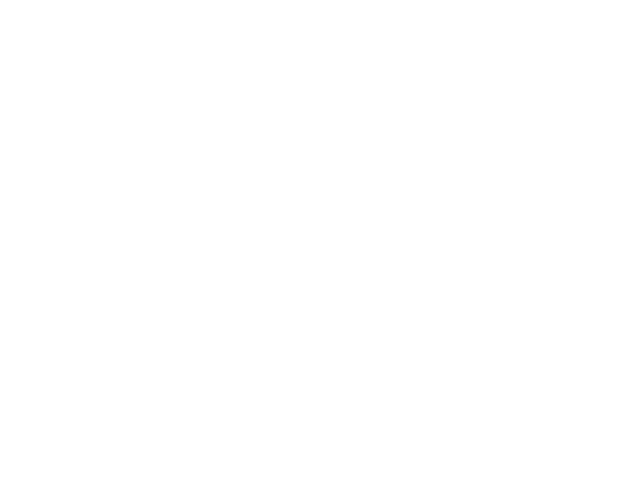

<IPython.core.display.Javascript object>


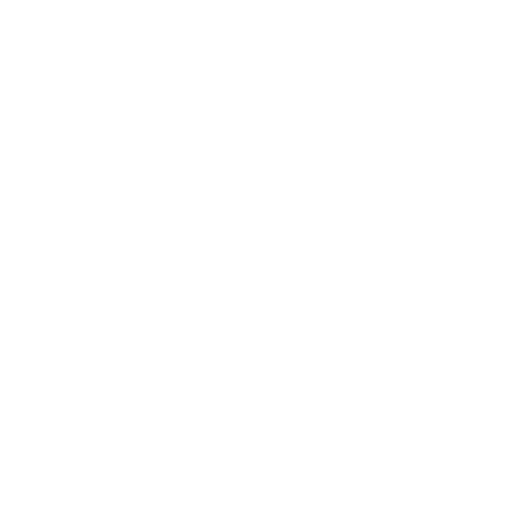

<IPython.core.display.Javascript object>


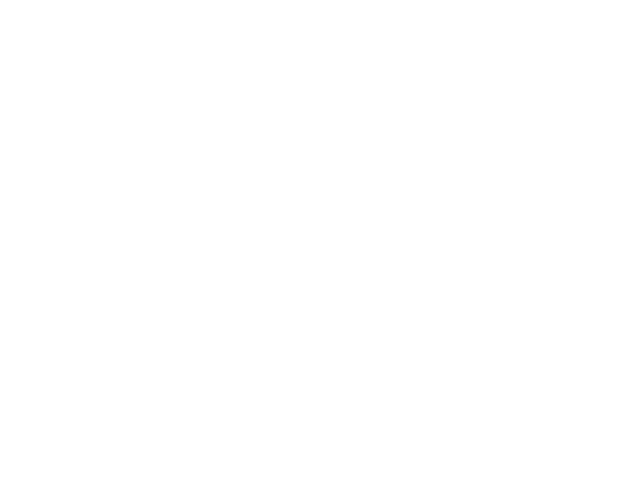

<IPython.core.display.Javascript object>


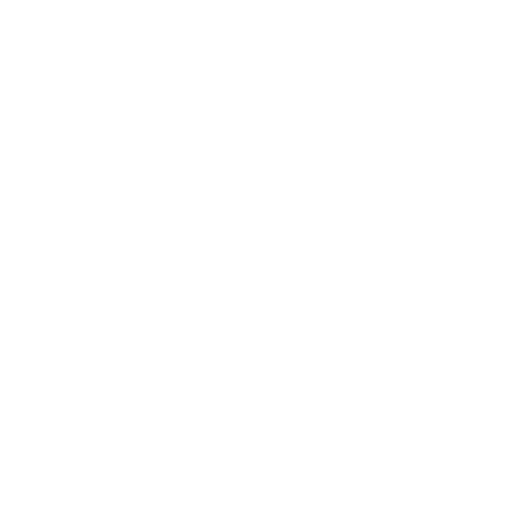

 10%|█         | 2/20 [00:00<00:01, 11.10it/s]

<IPython.core.display.Javascript object>


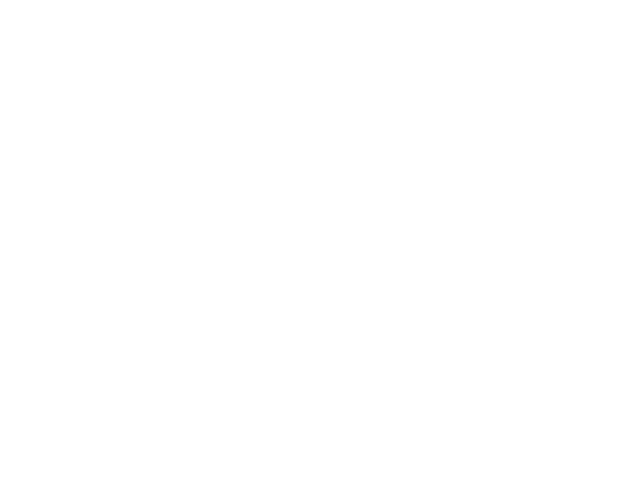

<IPython.core.display.Javascript object>


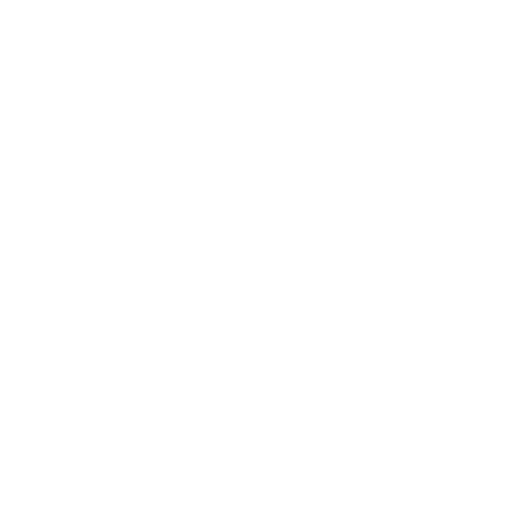

<IPython.core.display.Javascript object>


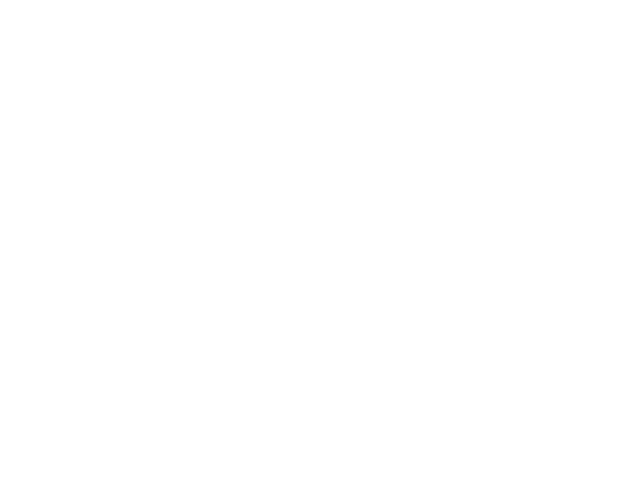

<IPython.core.display.Javascript object>


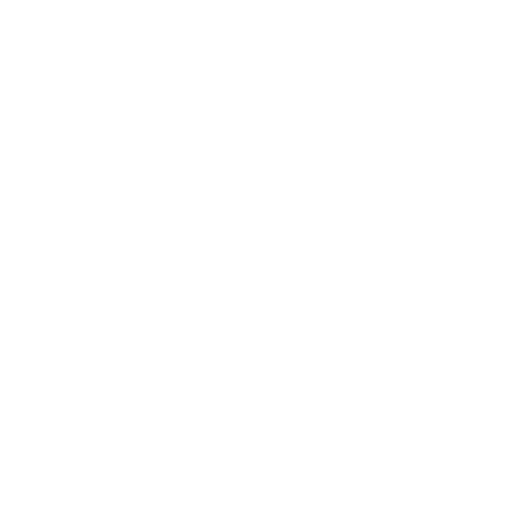

 20%|██        | 4/20 [00:00<00:01, 11.32it/s]

<IPython.core.display.Javascript object>


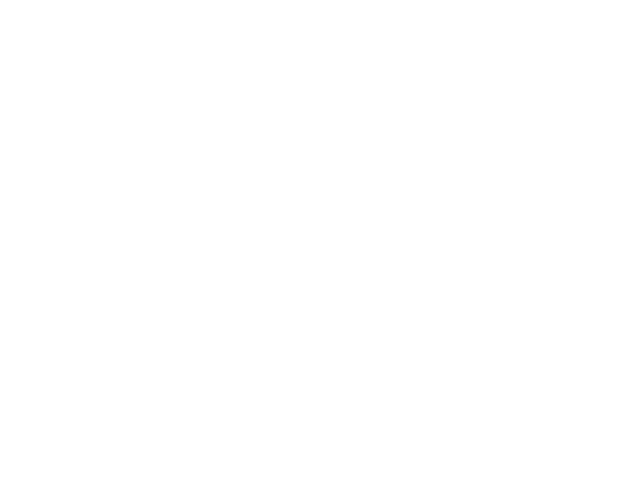

<IPython.core.display.Javascript object>


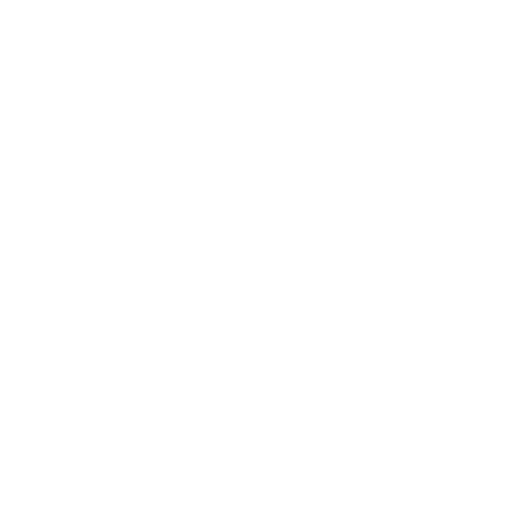

<IPython.core.display.Javascript object>


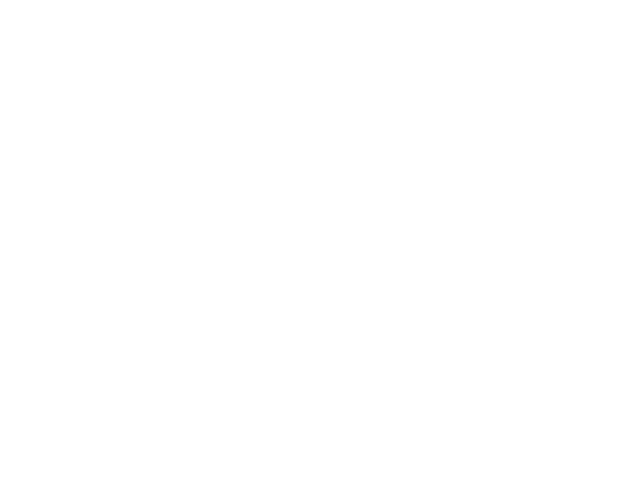

<IPython.core.display.Javascript object>


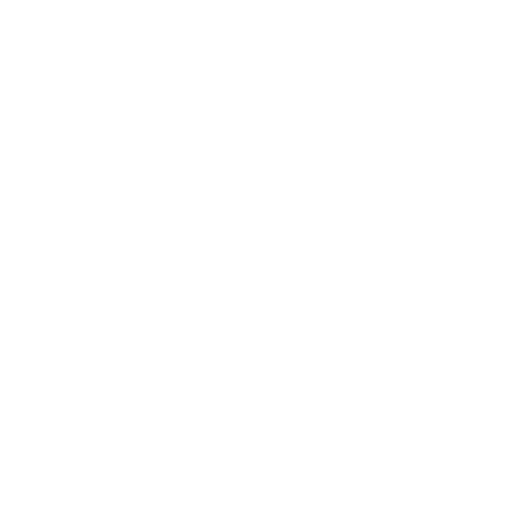

 30%|███       | 6/20 [00:00<00:01, 11.35it/s]

<IPython.core.display.Javascript object>


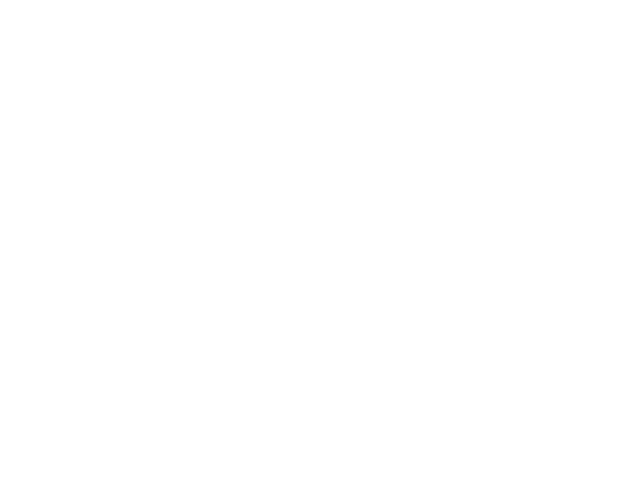

<IPython.core.display.Javascript object>


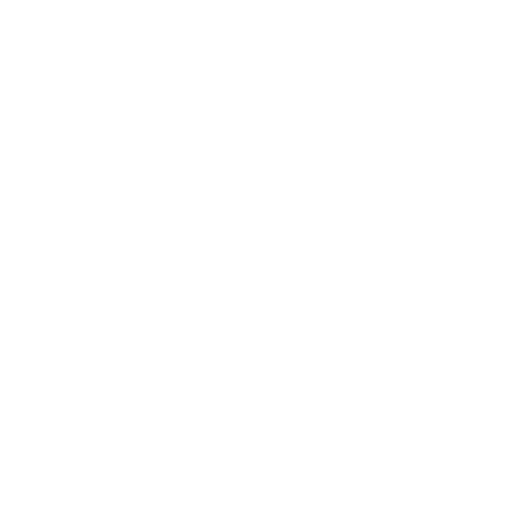

<IPython.core.display.Javascript object>


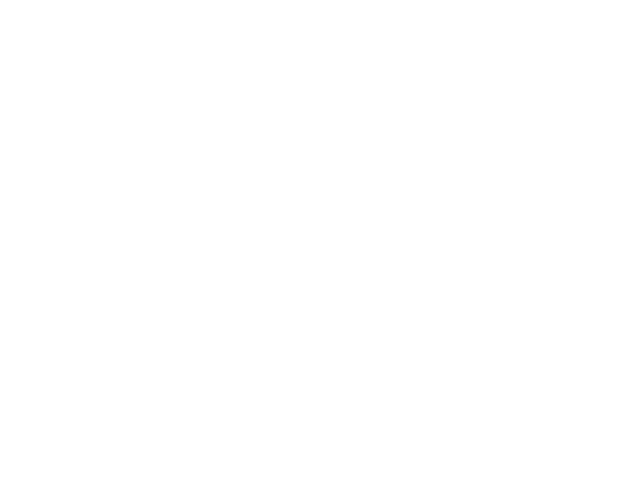

<IPython.core.display.Javascript object>


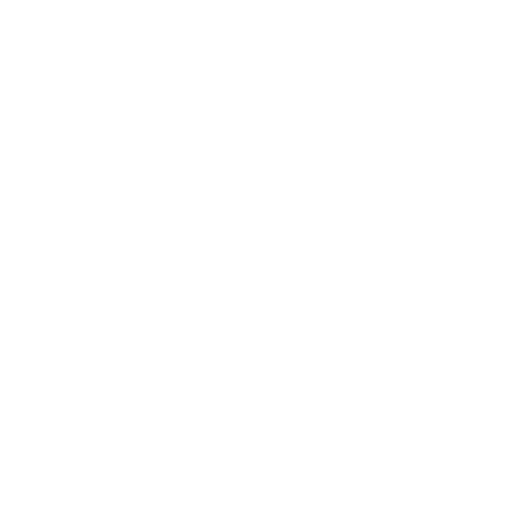

 40%|████      | 8/20 [00:00<00:01, 11.42it/s]

<IPython.core.display.Javascript object>


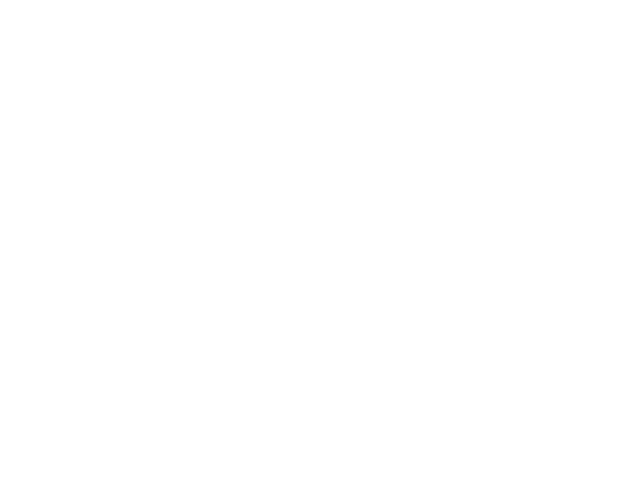

<IPython.core.display.Javascript object>


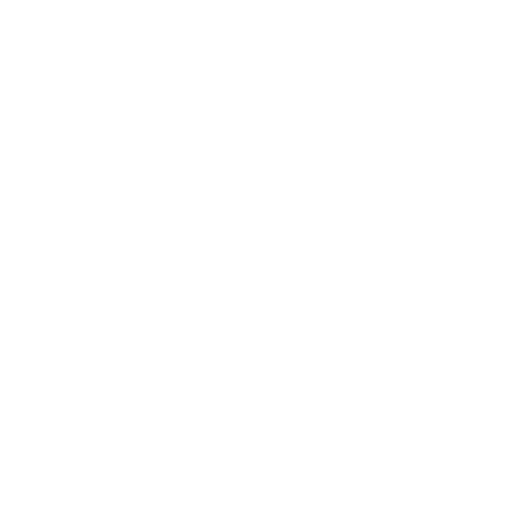

<IPython.core.display.Javascript object>


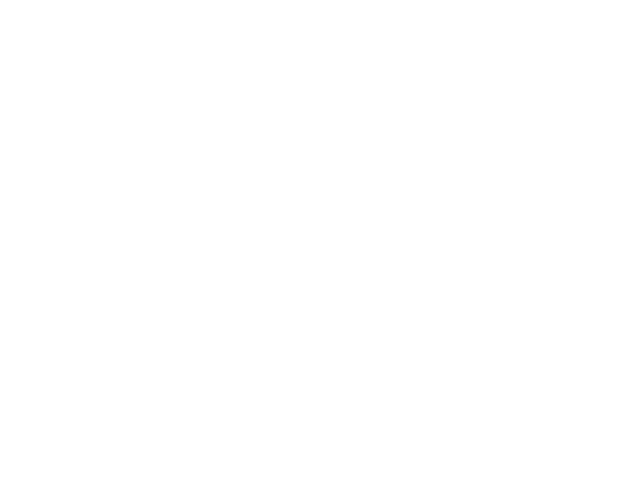

<IPython.core.display.Javascript object>


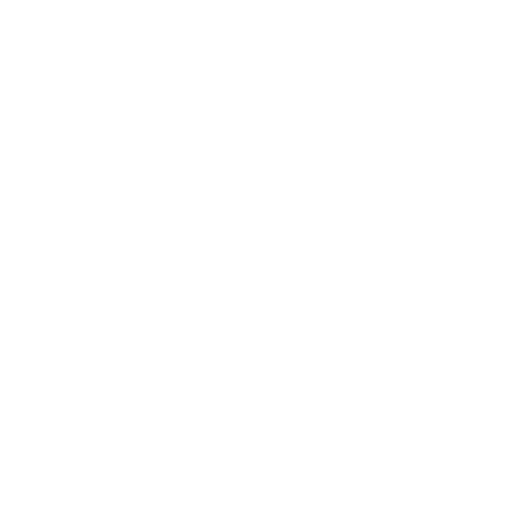

 50%|█████     | 10/20 [00:00<00:00, 11.59it/s]

<IPython.core.display.Javascript object>


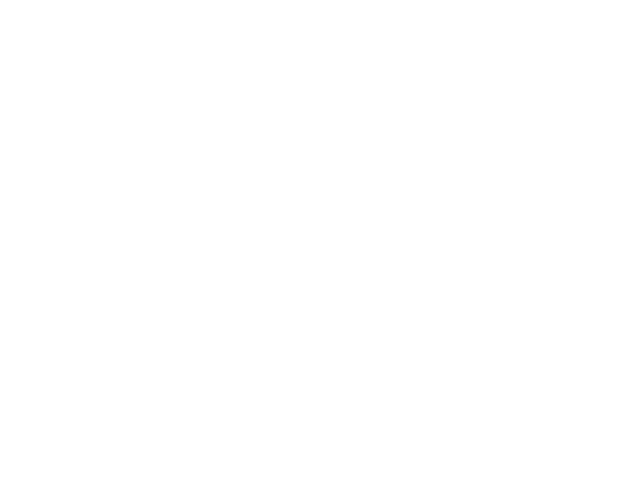

<IPython.core.display.Javascript object>


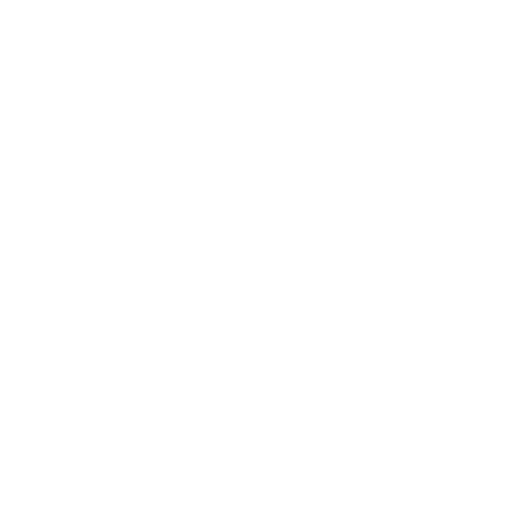

<IPython.core.display.Javascript object>


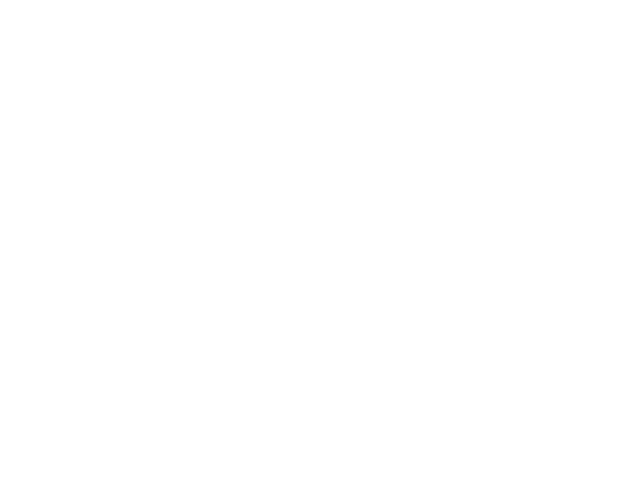

<IPython.core.display.Javascript object>


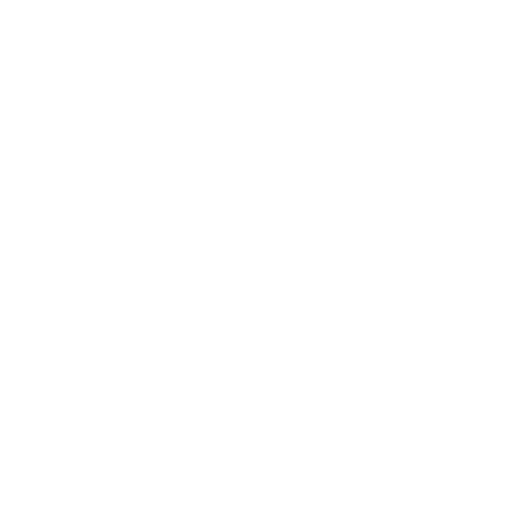

 60%|██████    | 12/20 [00:01<00:00, 11.53it/s]

<IPython.core.display.Javascript object>


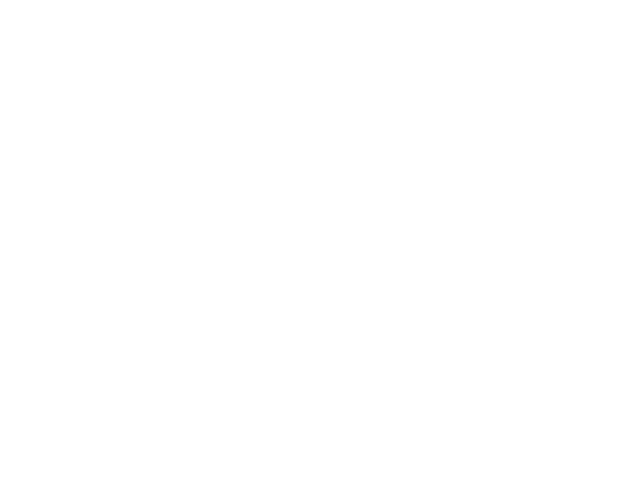

<IPython.core.display.Javascript object>


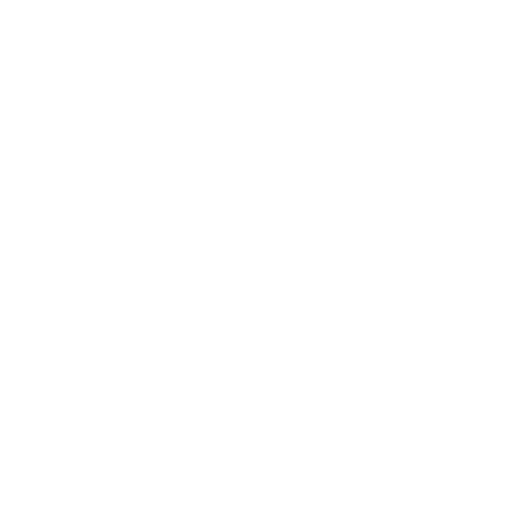

<IPython.core.display.Javascript object>


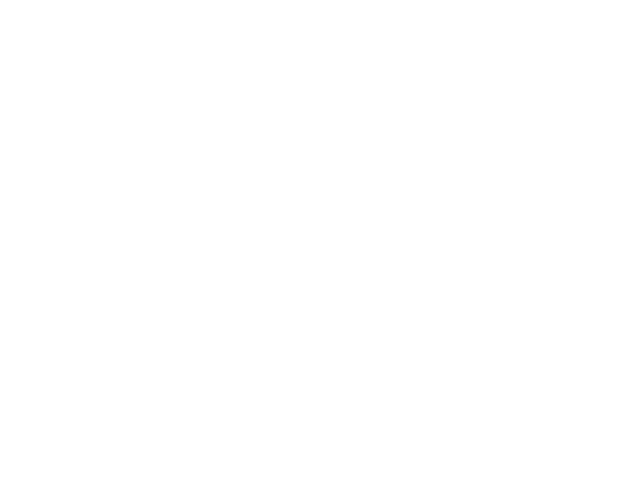

<IPython.core.display.Javascript object>


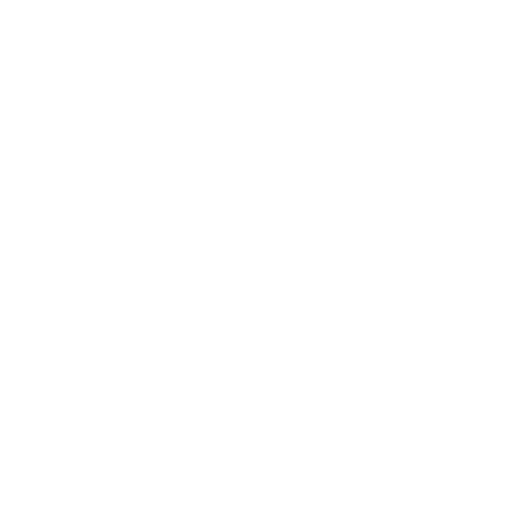

 70%|███████   | 14/20 [00:01<00:00, 11.32it/s]

<IPython.core.display.Javascript object>


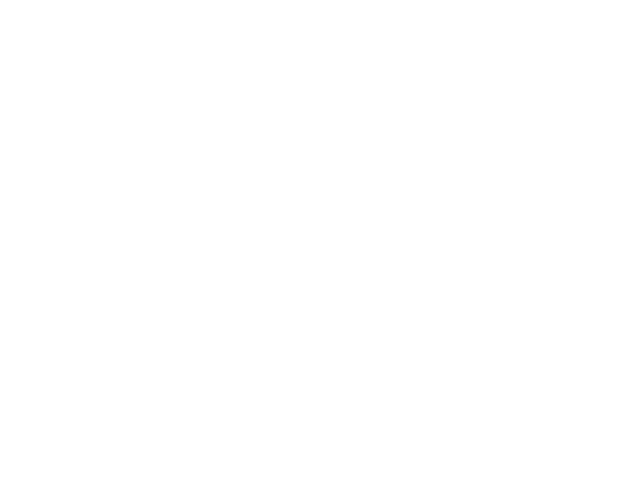

<IPython.core.display.Javascript object>


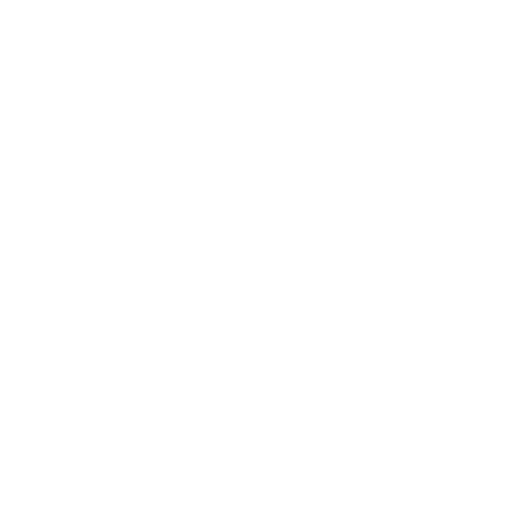

<IPython.core.display.Javascript object>


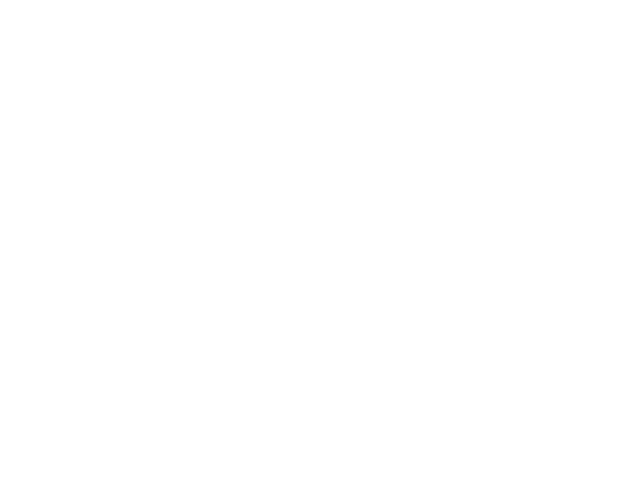

<IPython.core.display.Javascript object>


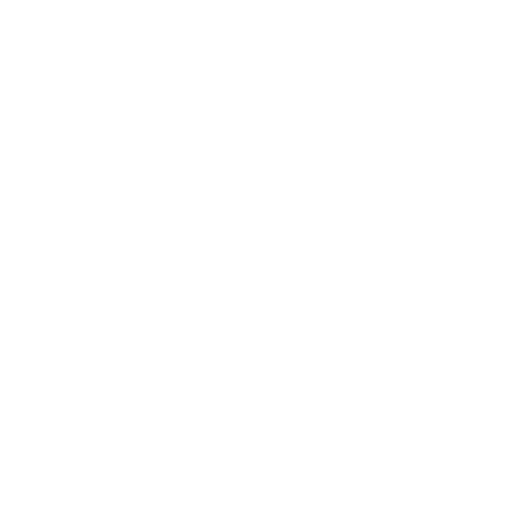

 80%|████████  | 16/20 [00:01<00:00, 11.40it/s]

<IPython.core.display.Javascript object>


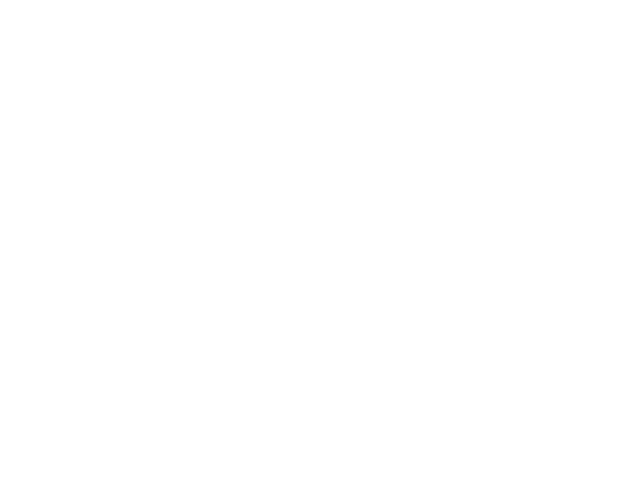

<IPython.core.display.Javascript object>


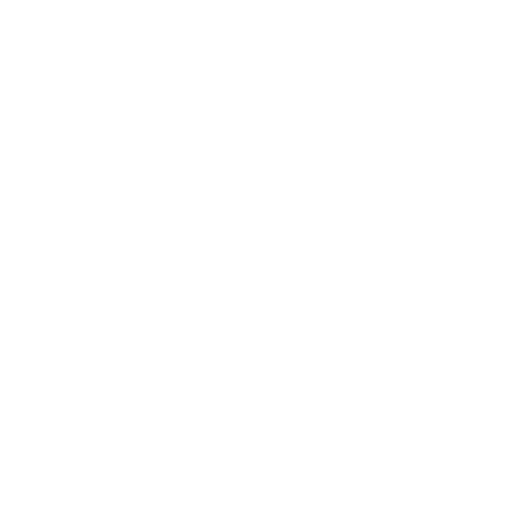

<IPython.core.display.Javascript object>


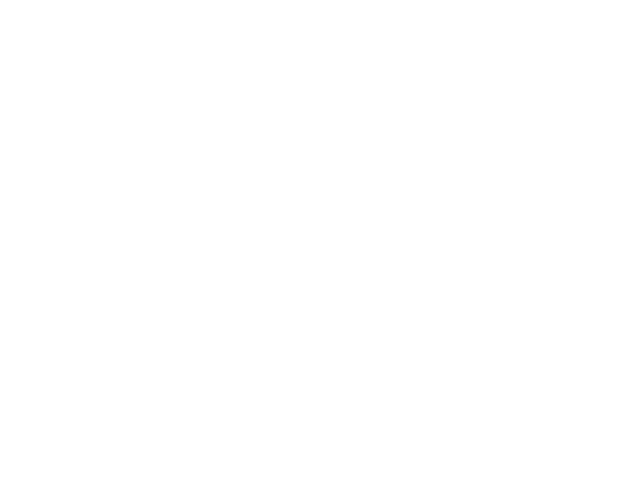

<IPython.core.display.Javascript object>


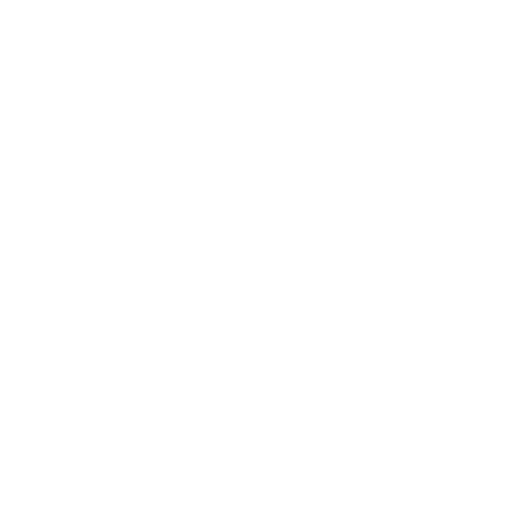

 90%|█████████ | 18/20 [00:01<00:00,  9.08it/s]

<IPython.core.display.Javascript object>


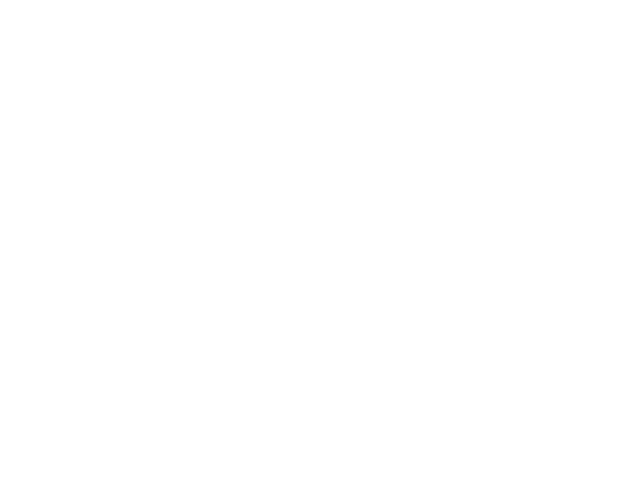

<IPython.core.display.Javascript object>


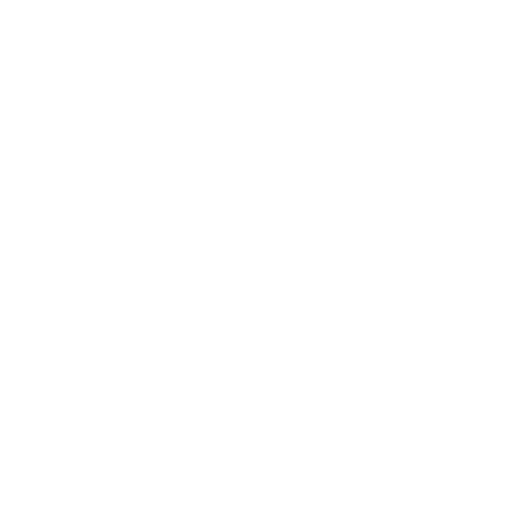

<IPython.core.display.Javascript object>


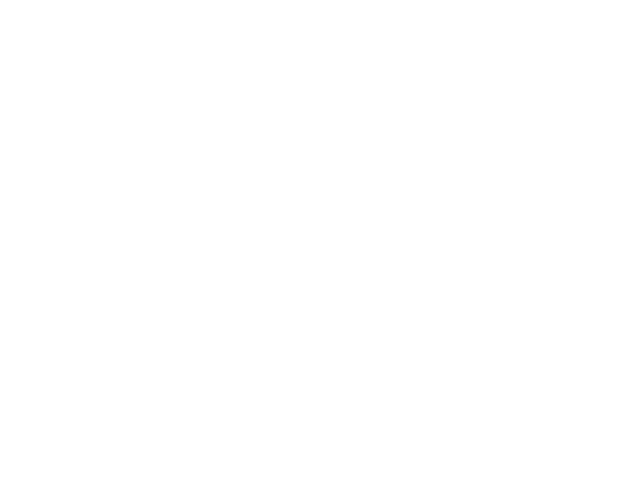

<IPython.core.display.Javascript object>


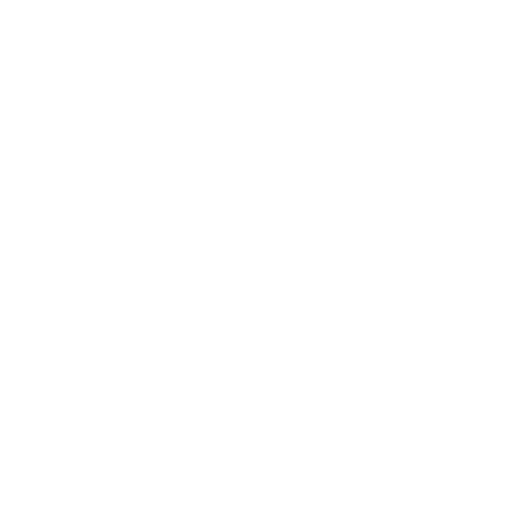

100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


In [14]:
%matplotlib notebook
deeplabcut.evaluate_network(config_path,plotting=True)

# Here you want to see a low pixel error! Of course, it can only be as good as the labeler, 
#so be sure your labels are good! (And you have trained enough ;)

## There is an optional refinement step :


In [ ]:
deeplabcut.refine_labels(config_path)

## Start Analyzing videos: 
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [4]:
# deeplabcut.analyze_videos(config_path,videos,videotype='avi',shuffle=1,trainingsetindex=0,gputouse=None,
#                           save_as_csv=False, destfolder=None, dynamic=(False,.5,10))

deeplabcut.analyze_videos(config_path,videofile_path,save_as_csv=True)

Using snapshot-13500 for model /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-models/iteration-0/Rat_leverFeb28-trainset95shuffle1
Initializing ResNet
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-models/iteration-0/Rat_leverFeb28-trainset95shuffle1/train/snapshot-13500


INFO:tensorflow:Restoring parameters from /home/shiva/DeepLabCut/conda-environments/Rat_lever-Shiva-2020-02-28/dlc-models/iteration-0/Rat_leverFeb28-trainset95shuffle1/train/snapshot-13500
  0%|          | 0/16380 [00:00<?, ?it/s]

Starting to analyze %  /home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi
Loading  /home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi
Duration of video [s]:  546.0 , recorded with  30.0 fps!
Overall # of frames:  16380  found with (before cropping) frame dimensions:  512 512
Starting to extract posture


16463it [06:28, 42.32it/s]                           

Detected frames:  16380
Saving results in /home/shiva/Desktop...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


'DLC_resnet50_Rat_leverFeb28shuffle1_13500'

## Create labeled video:
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [29]:
# deeplabcut.create_labeled_video(config_path,[‘fullpath/afolderofvideos’], videotype='.mp4', draw_skeleton=True)
deeplabcut.create_labeled_video(config_path,videofile_path, trailpoints=3)

  0%|          | 59/16380 [00:00<00:27, 585.38it/s]

Starting %  /home/shiva/Desktop ['/home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi']
Loading  /home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi and data.
16380
Duration of video [s]:  546.0 , recorded with  30.0 fps!
Overall # of frames:  16380 with cropped frame dimensions:  512 512
Generating frames and creating video.


100%|██████████| 16380/16380 [00:24<00:00, 678.43it/s]


## Plot the trajectories of the analyzed videos:
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

/home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi
Starting %  /home/shiva/Desktop /home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi
Loading  /home/shiva/Desktop/Rat_1_head_1_20190429_153155_C001H001S0001.avi and data.
/home/shiva/Desktop  already exists!


<IPython.core.display.Javascript object>


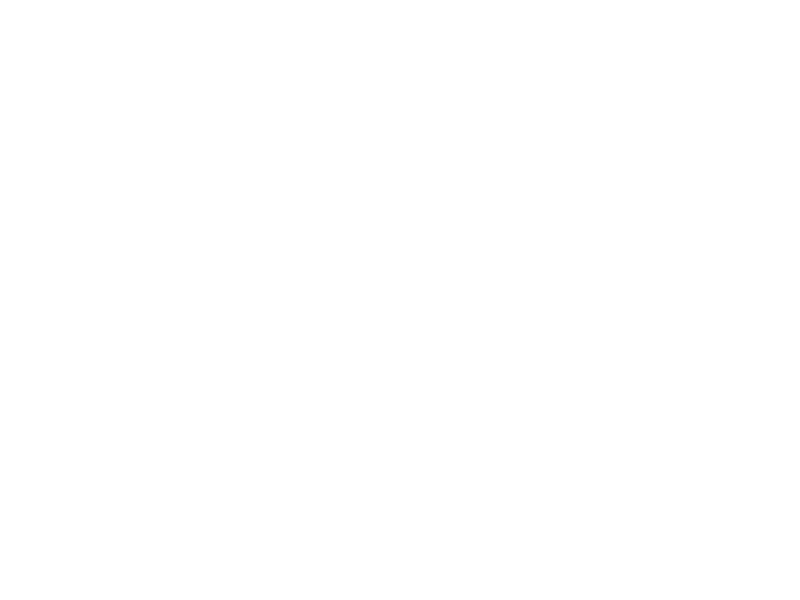

<IPython.core.display.Javascript object>


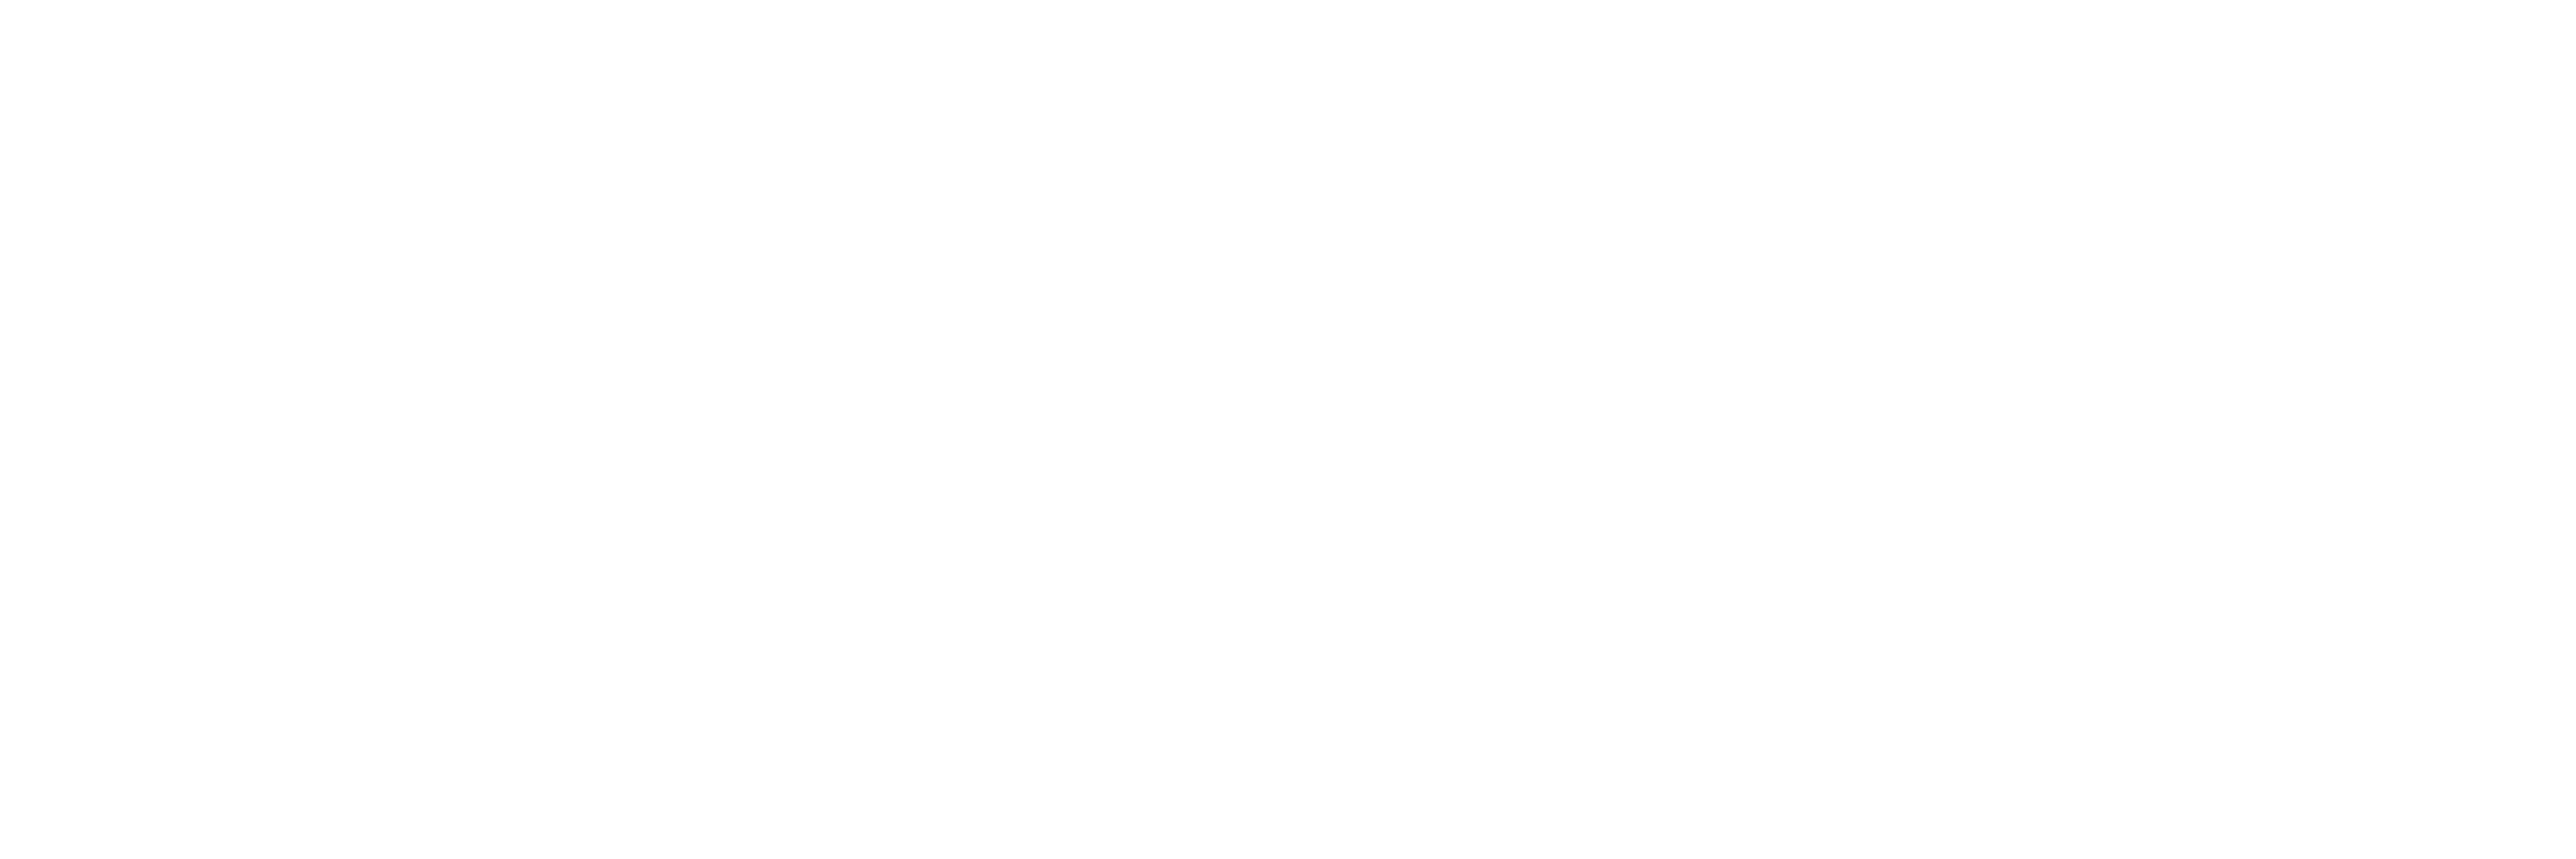

<IPython.core.display.Javascript object>


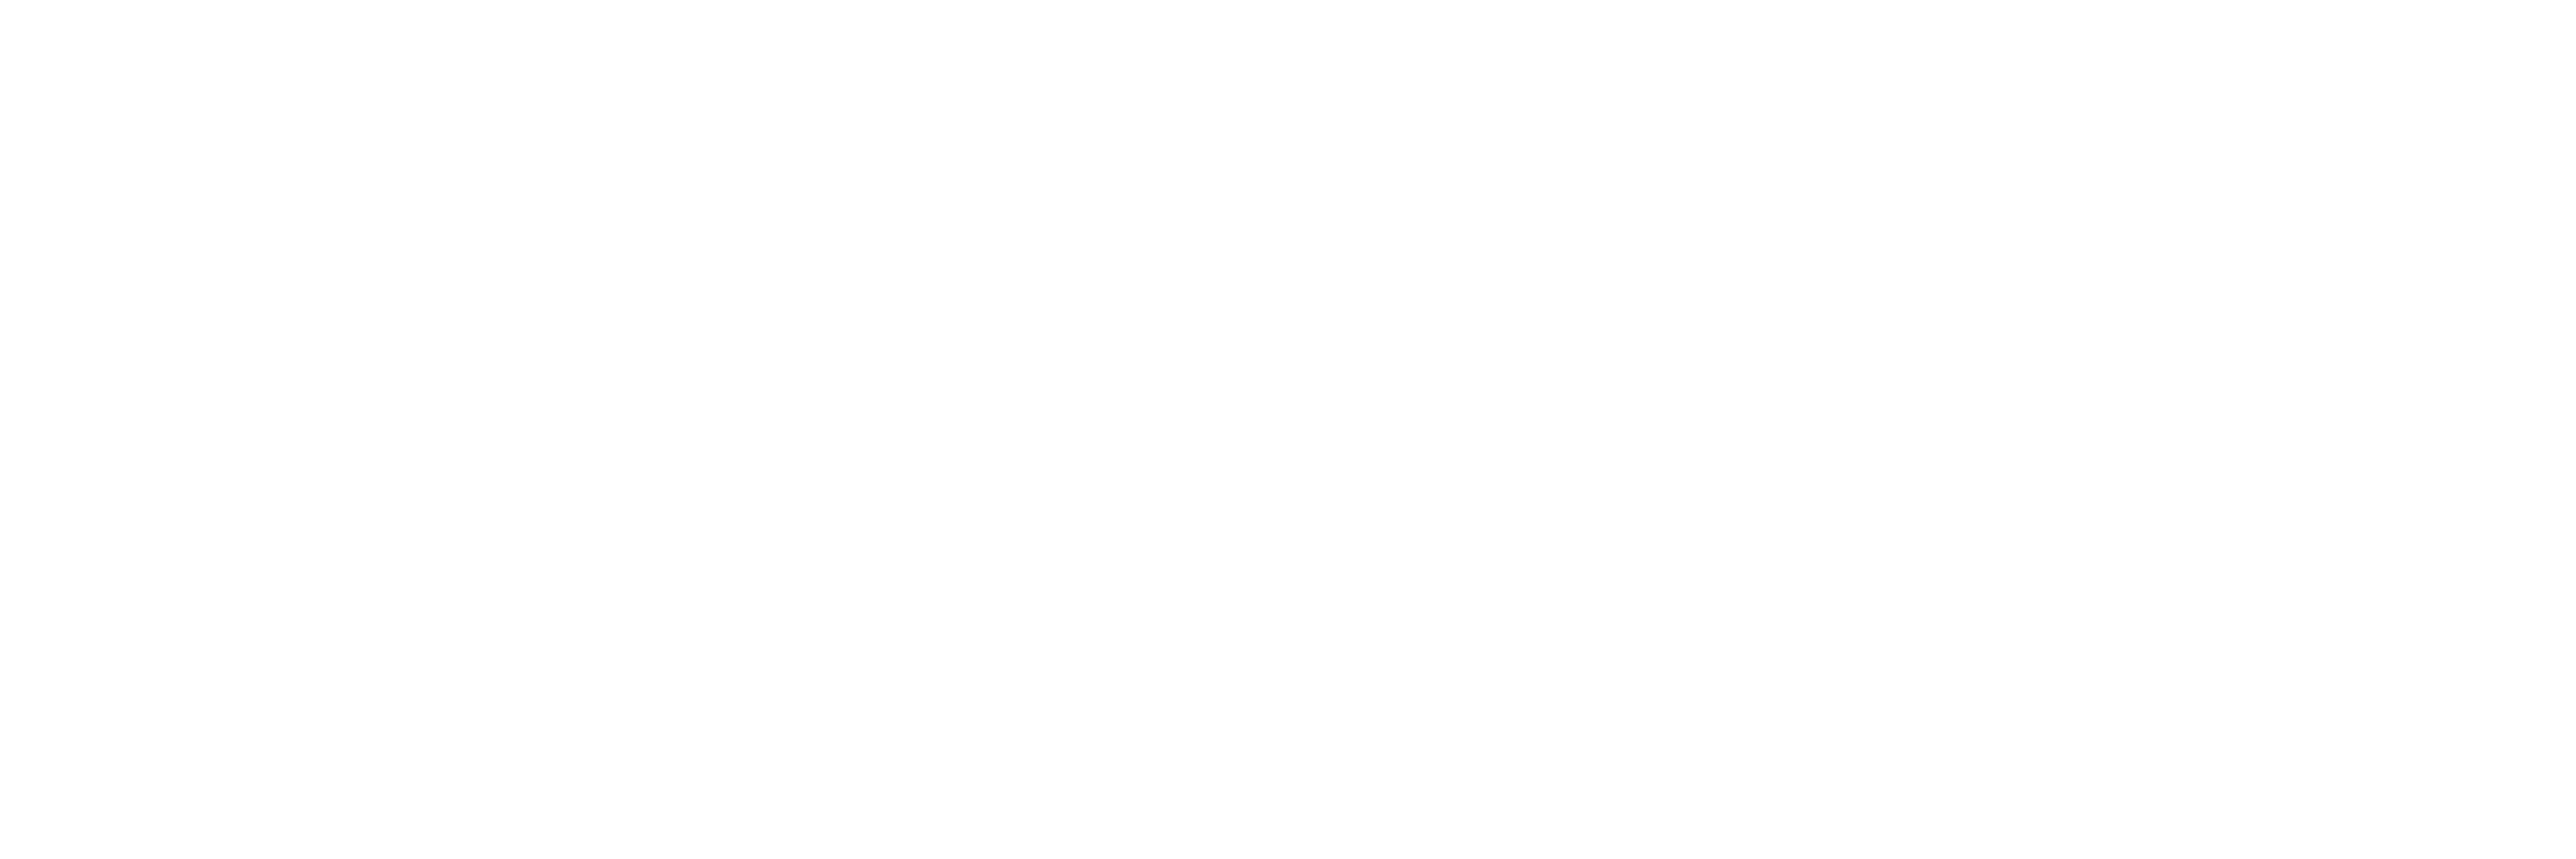

<IPython.core.display.Javascript object>


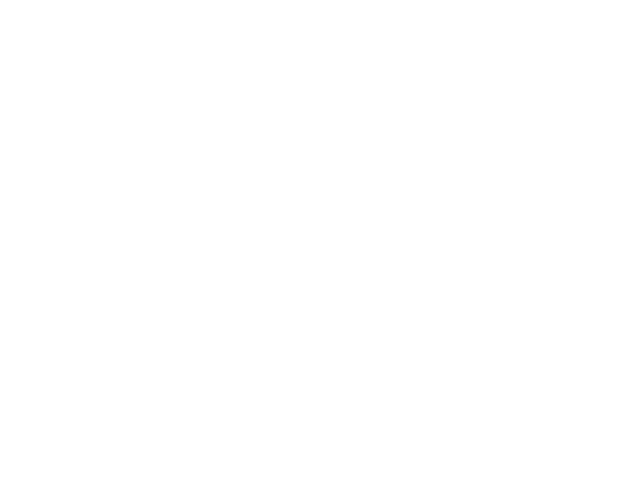

Plots created! Please check the directory "plot-poses" within the video directory


In [30]:
deeplabcut.plot_trajectories(config_path,videofile_path)